<a href="https://colab.research.google.com/github/davialvesguerra/trainee-iee/blob/main/6%C2%BA_Per%C3%ADodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
data = pd.read_csv('gdrive/My Drive/iee/6º Período/Musical_instruments_reviews.csv')
data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [4]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


### Baixando os pacotes para fazer a limpeza dos dados

In [5]:
import re
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)
stop_words.sort()

### Criando uma função para fazer uma busca no vetor de stop words mais rápida

In [8]:
from bisect import bisect_left

def BinarySearch(a, x):
    i = bisect_left(a, x)
    if i != len(a) and a[i] == x:
        return i
    else:
        return -1

### Criando a função para fazer a limpeza dos dados

In [10]:
def clean_text(text):

  text = str(text).lower()
  text = re.sub('\W', ' ', text)
  text = re.sub('\d', ' ', text)
  text = text if len(text) > 1 else ' '
  new_text = []

  for word in text.split():

    if BinarySearch(stop_words,word) != -1:
      pass

    else:
      new_text.append(word)

  new_text = ' '.join(new_text)

  return new_text

def prepare_words(vec_words):

  vec_words = [clean_text(text) for text in vec_words]
  
  return vec_words

 Escolhendo as variáveis explicativas e resposta

In [11]:
X = data['reviewText'] + data['summary'] 
y = data['overall']

In [12]:
X = prepare_words(X)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

Usando o método Tfidf para transformar as palavras em números relevantes

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).toarray()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

Usando o método GaussinaNB para fazer a predição do texto

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred

array([5., 4., 4., ..., 3., 5., 5.])

In [19]:
from sklearn.metrics import confusion_matrix

Verificando o resultado utilizando o tfidf e o GaussianNB

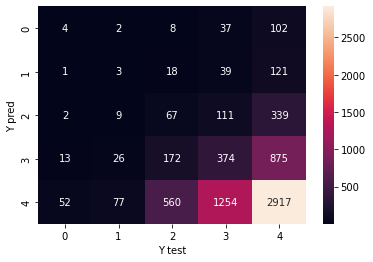

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True,  fmt='g')
ax.set(xlabel='Y test', ylabel='Y pred')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,y_pred)

0.46846721425588195

## Usando redes neurais

In [23]:
X = data['reviewText'] + data['summary'] 
X = X.apply(str)

In [24]:
X = prepare_words(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [27]:
token = Tokenizer(num_words=1600)
token.fit_on_texts(X_train)
X_train_H = token.texts_to_sequences(X_train)
X_test_H = token.texts_to_sequences(X_test)

In [28]:
y_train = tf.keras.utils.to_categorical(y_train)

In [29]:
vocab_size = len(token.word_index) + 1

In [30]:
from keras.preprocessing.sequence import pad_sequences

In [31]:
maxlen = 100

X_train_H = pad_sequences(X_train_H, padding='post', maxlen=maxlen)
X_test_H = pad_sequences(X_test_H, padding='post', maxlen=maxlen)

In [32]:
from tensorflow.keras import layers, models

In [33]:
parada = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3
    
)

Usando no modelo uma LSTM unidirecional

In [34]:
#vamos chamar de model1 o modelo que usa a LSTM unidirecional
dropout = 0.2
lr = 0.001

model1 = models.Sequential()
model1.add(layers.Embedding(input_dim=2000, output_dim= 256  ,mask_zero=True)) 
model1.add(tf.keras.layers.LSTM(64))
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(dropout))
model1.add(tf.keras.layers.Dense(6, activation='softmax'))
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

In [35]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         512000    
                                                                 
 lstm (LSTM)                 (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 598,726
Trainable params: 598,726
Non-trainable params: 0
_________________________________________________________________


In [36]:
history1 = model1.fit(X_train_H, y_train,
          epochs=10,
          verbose=2,
          validation_split = 0.15,
          batch_size=258,
          callbacks = parada)

Epoch 1/10
11/11 - 19s - loss: 1.7202 - accuracy: 0.5623 - val_loss: 1.4584 - val_accuracy: 0.6948 - 19s/epoch - 2s/step
Epoch 2/10
11/11 - 7s - loss: 1.1697 - accuracy: 0.6720 - val_loss: 0.9079 - val_accuracy: 0.6948 - 7s/epoch - 615ms/step
Epoch 3/10
11/11 - 6s - loss: 1.0357 - accuracy: 0.6583 - val_loss: 0.8767 - val_accuracy: 0.6948 - 6s/epoch - 557ms/step
Epoch 4/10
11/11 - 6s - loss: 0.9946 - accuracy: 0.6720 - val_loss: 0.8769 - val_accuracy: 0.6948 - 6s/epoch - 559ms/step
Epoch 5/10
11/11 - 7s - loss: 0.9555 - accuracy: 0.6705 - val_loss: 0.8551 - val_accuracy: 0.6948 - 7s/epoch - 606ms/step
Epoch 6/10
11/11 - 6s - loss: 0.8921 - accuracy: 0.6728 - val_loss: 0.8225 - val_accuracy: 0.6948 - 6s/epoch - 563ms/step
Epoch 7/10
11/11 - 6s - loss: 0.8021 - accuracy: 0.6823 - val_loss: 0.8022 - val_accuracy: 0.6926 - 6s/epoch - 562ms/step
Epoch 8/10
11/11 - 7s - loss: 0.7235 - accuracy: 0.7194 - val_loss: 0.8564 - val_accuracy: 0.6797 - 7s/epoch - 639ms/step
Epoch 9/10
11/11 - 6s - l

Usando no modelo uma LSTM bidirecional

In [37]:
#vamos chamar de model2 o modelo que usa a LSTM bidirecional
dropout = 0.2
lr = 0.001

model2 = models.Sequential()
model2.add(layers.Embedding(input_dim=2000, output_dim= 256  ,mask_zero=True)) 
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(dropout))
model2.add(tf.keras.layers.Dense(6, activation='softmax'))
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         512000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              164352    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 684,998
Trainable params: 684,998
Non-trainable params: 0
________________________________________________

In [39]:
history2 = model2.fit(X_train_H, y_train,
          epochs=10,
          verbose=2,
          validation_split = 0.15,
          batch_size=258,
          callbacks = parada)

Epoch 1/10
11/11 - 28s - loss: 1.6457 - accuracy: 0.6273 - val_loss: 1.1726 - val_accuracy: 0.6948 - 28s/epoch - 3s/step
Epoch 2/10
11/11 - 14s - loss: 1.0913 - accuracy: 0.6716 - val_loss: 0.9455 - val_accuracy: 0.6948 - 14s/epoch - 1s/step
Epoch 3/10
11/11 - 12s - loss: 0.9572 - accuracy: 0.6716 - val_loss: 0.8526 - val_accuracy: 0.6948 - 12s/epoch - 1s/step
Epoch 4/10
11/11 - 12s - loss: 0.8783 - accuracy: 0.6713 - val_loss: 0.8196 - val_accuracy: 0.6970 - 12s/epoch - 1s/step
Epoch 5/10
11/11 - 12s - loss: 0.7973 - accuracy: 0.6766 - val_loss: 0.8042 - val_accuracy: 0.6991 - 12s/epoch - 1s/step
Epoch 6/10
11/11 - 12s - loss: 0.7127 - accuracy: 0.7087 - val_loss: 0.8091 - val_accuracy: 0.6753 - 12s/epoch - 1s/step
Epoch 7/10
11/11 - 12s - loss: 0.6367 - accuracy: 0.7557 - val_loss: 0.8302 - val_accuracy: 0.6710 - 12s/epoch - 1s/step
Epoch 8/10
11/11 - 11s - loss: 0.5553 - accuracy: 0.7848 - val_loss: 0.8814 - val_accuracy: 0.6688 - 11s/epoch - 1s/step


Gráfico de acurácia e perda do modelo usando LSTM unidirecional

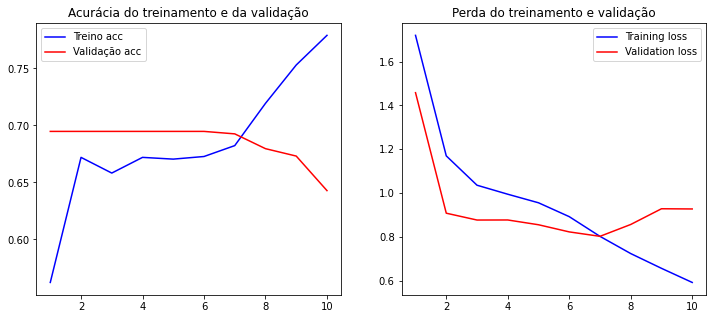

In [40]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Treino acc')
plt.plot(x, val_acc, 'r', label='Validação acc')
plt.title('Acurácia do treinamento e da validação')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Perda do treinamento e validação')
plt.legend()

Gráfico de acurácia e perda do modelo usando LSTM bidirecional

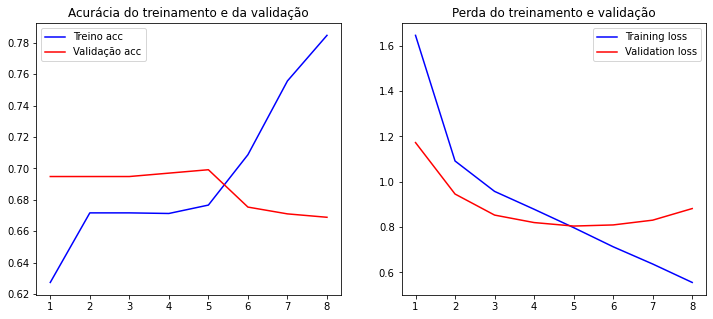

In [41]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Treino acc')
plt.plot(x, val_acc, 'r', label='Validação acc')
plt.title('Acurácia do treinamento e da validação')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Perda do treinamento e validação')
plt.legend()


Matrix de confusão usando o modelo com a LSTM unidirecional

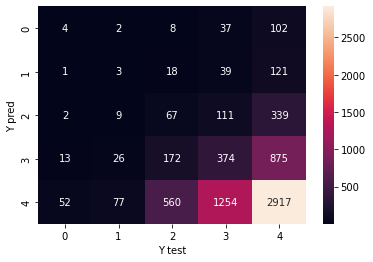

In [42]:
y_pred1 = model1.predict(X_test_H)
y_pred1 = [np.argmax(x) for x in y_pred1]

y_test1 = [int(x) for x in y_test]

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True,  fmt='g')
ax.set(xlabel='Y test', ylabel='Y pred')
plt.show()

Matrix de confusão usando o modelo com a LSTM bidirecional

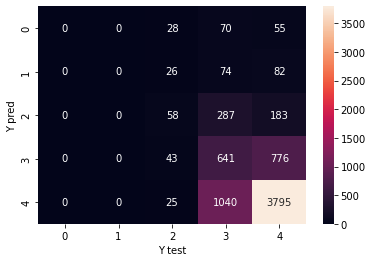

In [43]:
y_pred2 = model2.predict(X_test_H)
y_pred2 = [np.argmax(x) for x in y_pred2]

y_test = [int(x) for x in y_test]

conf_matrix = confusion_matrix(y_test, y_pred2)

ax = sns.heatmap(conf_matrix, annot=True,  fmt='g')
ax.set(xlabel='Y test', ylabel='Y pred')
plt.show()